In [15]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
#get all the Files
path='/nfs/see-fs-01_users/gy11s2s/Python/NDACC_files/Table_mountain/Plotting_months/Jan1991-Nov1992/'
file_paths = []
file_names = sorted(os.listdir(path))
for name in file_names:
        filepath = os.path.join(path,name)
        if os.path.isfile(filepath) and filepath[-4:] == '.txt':
            file_paths.append(filepath)
            

In [17]:
print file_paths [0]
print file_paths[-1]
# Check number of files in directory
import fnmatch

print len(fnmatch.filter(os.listdir('/nfs/see-fs-01_users/gy11s2s/Python/NDACC_files/Table_mountain/Plotting_months/Jan1991-Nov1992/'), '*.txt'))

/nfs/see-fs-01_users/gy11s2s/Python/NDACC_files/Table_mountain/Plotting_months/Jan1991-Nov1992/1991.01.13.txt
/nfs/see-fs-01_users/gy11s2s/Python/NDACC_files/Table_mountain/Plotting_months/Jan1991-Nov1992/1992.11.19.txt
197


In [18]:
df_TabMtn = pd.DataFrame()
for files in file_paths:
    print files
    #Read in First First File
    data = np.loadtxt(fname=files, delimiter=',', skiprows=2, usecols=(0,1))
    col1 = data[:,0]
    col2 = data[:,1]
    altitude = col1/1000# Converts altitude to km
    backscatter=col2*0.001
    Date=pd.to_datetime(files[-14:-4], format='%Y.%m.%d') # Converts filename date to Pandas datetime
    d_backscatter={Date : backscatter}
    #print Date
    print d_backscatter
    if df_TabMtn.empty:
        df_TabMtn = pd.DataFrame(d_backscatter, index=altitude)
    else:
        df_temp_BS=pd.DataFrame(d_backscatter, index=altitude)
        df_TabMtn = df_TabMtn.join(df_temp_BS)


#Transposes Axes so that the TIme is the Index, Makes reading it back in easier.        
df_TabMtn=df_TabMtn.transpose()

/nfs/see-fs-01_users/gy11s2s/Python/NDACC_files/Table_mountain/Plotting_months/Jan1991-Nov1992/1991.01.13.txt
{Timestamp('1991-01-13 00:00:00'): array([ 0.847,  0.875,  0.896,  0.909,  0.921,  0.94 ,  0.954,  0.966,
        0.979,  0.979,  0.987,  0.981,  1.01 ,  1.009,  1.008,  1.016,
        1.006,  1.014,  1.02 ,  1.012,  1.007,  1.005,  1.011,  1.016,
        1.018,  1.018,  1.014,  1.007,  1.004,  1.008,  1.01 ,  0.999,
        0.992,  0.99 ,  0.997,  1.01 ,  1.024,  1.036,  1.043,  1.045,
        1.042,  1.032,  1.02 ,  1.008,  1.   ,  0.992,  0.987,  0.983,
        0.981,  0.983,  0.983,  0.985,  0.986,  0.988])}
/nfs/see-fs-01_users/gy11s2s/Python/NDACC_files/Table_mountain/Plotting_months/Jan1991-Nov1992/1991.01.16.txt
{Timestamp('1991-01-16 00:00:00'): array([ 0.953,  0.942,  0.951,  0.958,  0.974,  0.979,  0.985,  0.983,
        0.997,  1.025,  1.018,  1.01 ,  1.013,  1.013,  1.023,  1.013,
        1.02 ,  1.009,  1.012,  1.019,  1.029,  1.021,  1.017,  1.019,
        1.018,

IndexError: list index out of range

In [19]:
#Save data to CSV File
df_TabMtn.to_csv(path+'TabMtn_Jan1991-Nov1992.csv')

In [27]:
#Read from CSV File
TabMtn_data = pd.DataFrame()
TabMtn_data=pd.read_csv('/nfs/see-fs-01_users/gy11s2s/Python/NDACC_files/Table_mountain/Plotting_months/Jan1991-Nov1992/TabMtn_Jan1991-Nov1992.csv',
                     index_col=0,parse_dates=True,infer_datetime_format=True)
#Convert the frame to its Numpy-array representation.
#TabMtn_data=TabMtn_data.transpose() # Transpose it so it is easier to plot
TabMtn_data.as_matrix #Turns it into a normal Numpy array;
                    #Doing this makes it so you dont have to define X, Y and Z when plotting

<bound method DataFrame.as_matrix of         1991-01-13  1991-01-16  1991-01-17  1991-01-19  1991-01-24  \
13.325       0.847       0.951       1.097       0.683       0.844   
13.925       0.875       0.958       1.087       0.707       0.850   
14.525       0.896       0.974       1.101       0.742       0.862   
15.125       0.909       0.979       1.095       0.765       0.878   
15.725       0.921       0.985       1.097       0.785       0.893   
16.325       0.940       0.983       1.101       0.802       0.898   
16.925       0.954       0.997       1.098       0.827       0.915   
17.525       0.966       1.025       1.094       0.846       0.926   
18.125       0.979       1.018       1.094       0.856       0.930   
18.725       0.979       1.010       1.085       0.875       0.928   
19.325       0.987       1.013       1.095       0.887       0.945   
19.925       0.981       1.013       1.084       0.890       0.942   
20.525       1.010       1.023       1.083       0.90

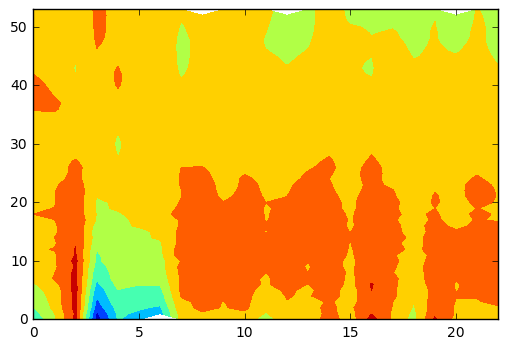

In [28]:
#Plot Contour form Data Frame As a Matrix

fig = plt.figure()
graph = fig.add_subplot(111)
graph.contourf(TabMtn_data)
#Not quite sure why it does not use the dates on the x axis or actual altitudes

ValueError: invalid literal for float(): 1991-05-15

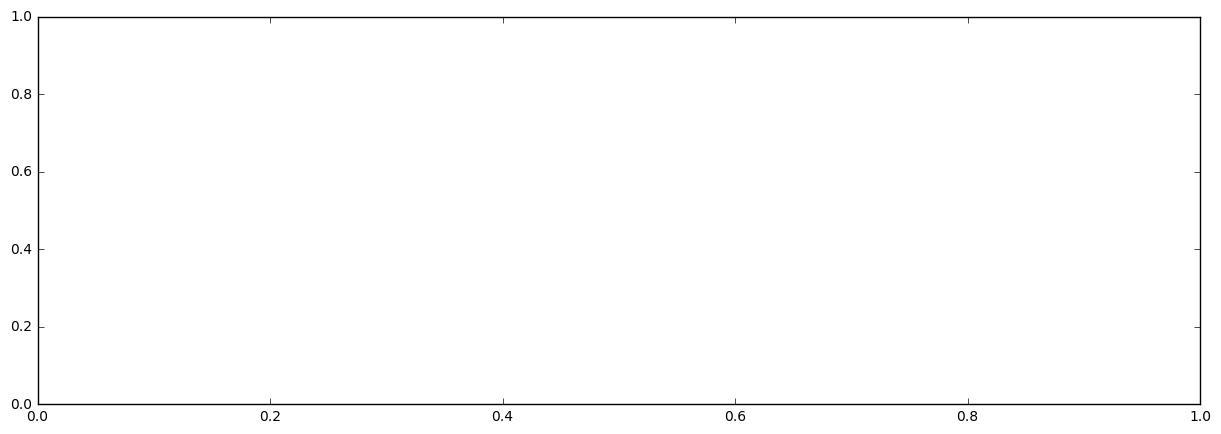

In [30]:
#Using column and Index Info
Dates=TabMtn_data.columns# This is in date time format so it is easy to deal with
#print Dates
Alts=map(float,pd.Index.tolist(TabMtn_data.index)) #Initially this is in a funny Index object so we need to change to a list of float values
#print Alts


# define the colormap
cmap = plt.cm.get_cmap('OrRd', 11)
# extract all colors from the map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (1.0,1.0,1.0,1.0)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
#Set Color For Values less than plot Bounds
cmap.set_under('w')


TabMtn_data_masked_array=np.ma.masked_where(TabMtn_data<1, TabMtn_data) # Masking out data below a Threshold

#Make it Log-Scale to See FIne Details.
TabMtn_data_masked_array_Log=np.log10(TabMtn_data_masked_array)
#TabMtn_data_array_Log=np.log(TabMtn_data)

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
TabMtn=ax.contourf(Dates,Alts,TabMtn_data_masked_array_Log,8,cmap=cmap, vmin=0, vmax=2)
#TabMtn=ax.contourf(Dates,Alts,TabMtn_data_array_Log,8,cmap=cmap, vmin=0, vmax=2)
cbar = plt.colorbar(TabMtn) # Creates colour bar/scale
plt.title('Backscatter ratio at Table Mountain (353 nm) January 1991 - November 1992')
plt.xlabel('Time')
plt.ylabel('Altitude (km)')
plt.grid()
plt.ylim(17,30)
fig.savefig('/nfs/see-fs-01_users/gy11s2s/Python/Layers_over_time_analysis/Lidar/Table_mountain_Jan1991-Nov1992.png', bbox_inches='tight')